## Importing Relevant Packages

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Importing and preparing the data

In [3]:
data = pd.read_csv('data/choice_95.csv')

In [4]:
## Changing the round column title to integers
data.rename(columns=lambda x: x[7:], inplace=True)

In [5]:
## https://www.youtube.com/watch?v=mEGYznC6F9s
kmeans = KMeans(
    n_clusters=2, init='random',
    n_init=1, 
    tol=1e-04, random_state=2
)

The two sets of numbers we need to focus on are the numbers along the X-axis which represent the round (data.columns) and the numbers along the Y-axis which represent the choice made (data.iloc[0])

## Creating the array to provide to the k means algorithm

In [6]:
listt = []
for i in range(0,95):
    listt.append([int(data.columns[i]),int(data.iloc[0][i])])
my_array = np.array(listt)

In [7]:
my_array

array([[ 1,  2],
       [ 2,  2],
       [ 3,  2],
       [ 4,  2],
       [ 5,  2],
       [ 6,  2],
       [ 7,  2],
       [ 8,  2],
       [ 9,  2],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  3],
       [14,  4],
       [15,  1],
       [16,  1],
       [17,  3],
       [18,  3],
       [19,  4],
       [20,  4],
       [21,  4],
       [22,  4],
       [23,  4],
       [24,  4],
       [25,  4],
       [26,  4],
       [27,  1],
       [28,  4],
       [29,  1],
       [30,  4],
       [31,  4],
       [32,  4],
       [33,  4],
       [34,  4],
       [35,  1],
       [36,  4],
       [37,  4],
       [38,  4],
       [39,  4],
       [40,  4],
       [41,  1],
       [42,  4],
       [43,  4],
       [44,  4],
       [45,  4],
       [46,  4],
       [47,  4],
       [48,  4],
       [49,  4],
       [50,  4],
       [51,  1],
       [52,  4],
       [53,  4],
       [54,  4],
       [55,  4],
       [56,  4],
       [57,  4],
       [58,  1],
       [59,  4

## Running the K Means Algorithm

In [8]:
y_km = kmeans.fit_predict(my_array)

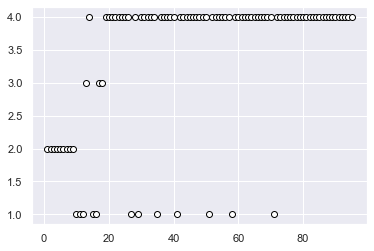

In [47]:
# plot the data points
plt.scatter(
   my_array[:, 0], my_array[:, 1],
   c='white',
   edgecolor='black'
)

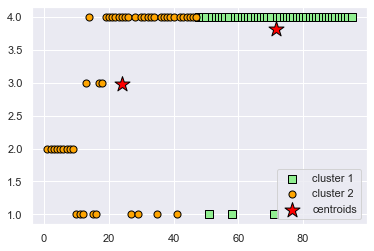

In [49]:
# plot the 3 clusters
plt.scatter(
    my_array[y_km == 0, 0], my_array[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    my_array[y_km == 1, 0], my_array[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

## Creating a plot of the entire choice pool

In [51]:
listt = []
for i in range(0,95):
    for j in range(0,15):
        listt.append([int(data.columns[i]),int(data.iloc[j][i])])
my_array = np.array(listt)
## this is now an array of size 95 * 15 * 2 = 2850

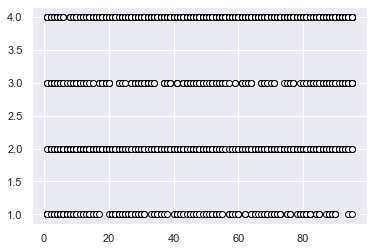

In [54]:
# plot the data points
plt.scatter(
   my_array[:, 0], my_array[:, 1],
   c='white',
   edgecolor='black'
)

## Adjusting the data to be a running average choice

In [66]:
avg_data_row = [data.iloc[0][0]]

for i in range(1,95):
    rolling_average = ((avg_data_row[-1]*(i)) + data.iloc[0][i]) / (i+1)
    avg_data_row.append(rolling_average)

In [68]:
## creating an array
listt = []
for i in range(0,95):
    listt.append([int(data.columns[i]),avg_data_row[i]])
my_array = np.array(listt)

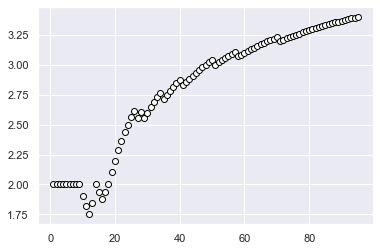

In [69]:
# plot the data points
plt.scatter(
   my_array[:, 0], my_array[:, 1],
   c='white',
   edgecolor='black'
)

## Adjusting the data to be a running average choice for all rows

In [90]:
avg_data_row = [[int(data.columns[0]),data.iloc[0][0]]]

for i in range(1,95):
    rolling_average = ((avg_data_row[-1][1]*(i)) + data.iloc[0][i]) / (i+1)
    avg_data_row.append([data.columns[i],rolling_average])

In [92]:
avg_data_row = []
for j in range(0,15):
    avg_data_row.append([int(data.columns[0]),data.iloc[j][0]])
    for i in range(1,95):
        rolling_average = ((avg_data_row[-1][1]*(i)) + data.iloc[j][i]) / (i+1)
        avg_data_row.append([data.columns[i],rolling_average])

In [97]:
my_array = np.array(avg_data_row)

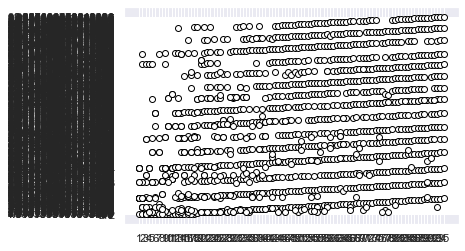

In [100]:
# plot the data points
plt.scatter(
   my_array[:, 0], my_array[:, 1],
   c='white',
   edgecolor='black'
)

In [102]:
averages = []
for i in range(0,15):
    averages.append(sum(data.iloc[i])/95)
averages

[3.4,
 2.568421052631579,
 2.778947368421053,
 2.8105263157894735,
 3.0210526315789474,
 3.221052631578947,
 2.663157894736842,
 2.9263157894736844,
 2.8421052631578947,
 3.357894736842105,
 2.6210526315789475,
 2.463157894736842,
 2.873684210526316,
 2.6,
 2.957894736842105]

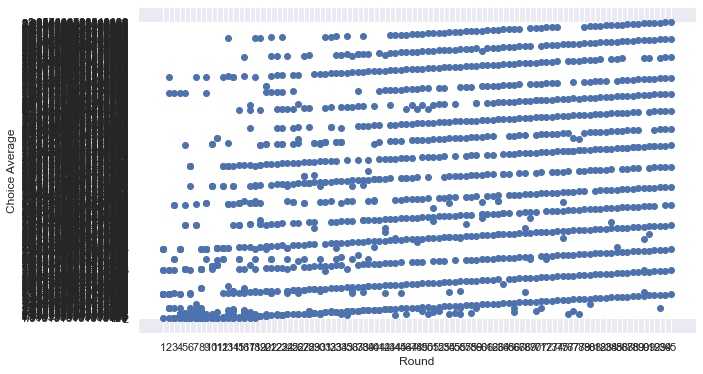

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(my_array[:, 0], my_array[:, 1])

ax.set(xlabel="Round", ylabel="Choice Average")

plt.show()

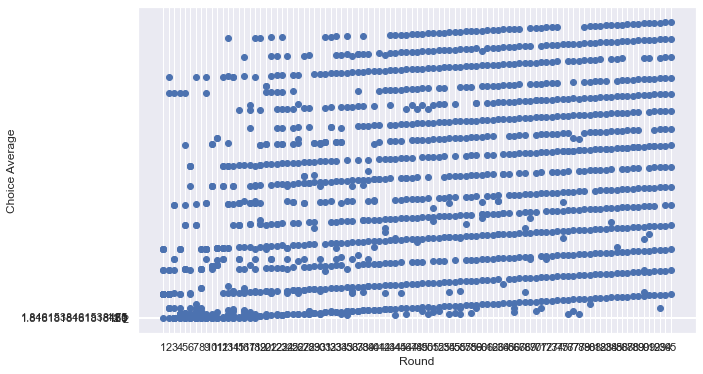

In [141]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(my_array[:, 0], my_array[:, 1])

ax.set(xlabel="Round", ylabel="Choice Average")
ax.set_yticks([0,1,2,3,4,5])
plt.show()

([<matplotlib.axis.YTick at 0x22cf6c847c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

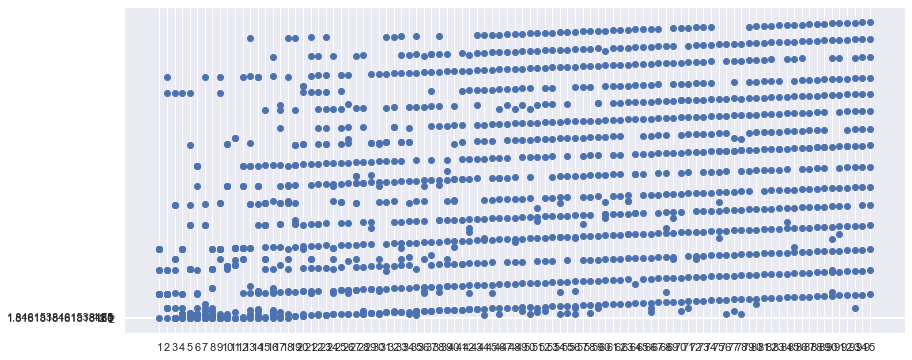

In [133]:
plt.scatter(my_array[:, 0], my_array[:, 1])

plt.yticks(ticks=[0,1,2,3,4,5])

([], [])

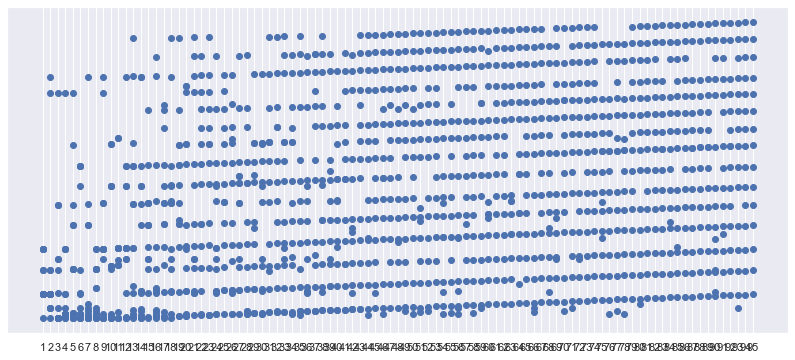

In [134]:
plt.scatter(my_array[:, 0], my_array[:, 1])

plt.yticks(ticks=[])